# **Matrices de rotación simples en un espacio tridimensional**

**Docente:** Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [6]:
import numpy as np
from sympy import*
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
init_printing()

# **Función dibujar un vector punto en un espacio tridimencional**

In [2]:
def dibujar_punto(punto, label, x_lim = [0, 1], y_lim=[0, 1], z_lim=[0, 1]):
  """
  Dibuja un punto en un espacio tridimensional.

  Parametros:
    punto: Un vector NumPy de tres elementos representando las coordenadas (x, y, z) del punto.
    label: Una cadena de texto para etiquetar el punto en el gráfico.
    x_lim: Una lista de dos elementos que define los límites del eje x.
    y_lim: Una lista de dos elementos que define los límites del eje y.
    z_lim: Una lista de dos elementos que define los límites del eje z.
  """

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(punto[0], punto[1], punto[2], color='b', label=label)

  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title('Espacio 3D')

  ax.quiver(0, 0, 0, punto[0], punto[1], punto[2], color='b')

  ax.set_xlim(x_lim)
  ax.set_ylim(y_lim)
  ax.set_zlim(z_lim)
  ax.legend()
  plt.show()

In [7]:
## Angulo simbolico
theta = symbols("theta",  real=True)

### **Rotación en el eje x**


In [12]:
## Matrix de rotación simbolica sobre le eje X
R_x = Matrix([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]])
R_x

⎡1    0        0   ⎤
⎢                  ⎥
⎢0  cos(θ)  -sin(θ)⎥
⎢                  ⎥
⎣0  sin(θ)  cos(θ) ⎦

### **Definición de un punto de prueba en el espacio tridimencional**

In [8]:
P0 = np.array([1, 1, 0])
print(P0)

[1 1 0]


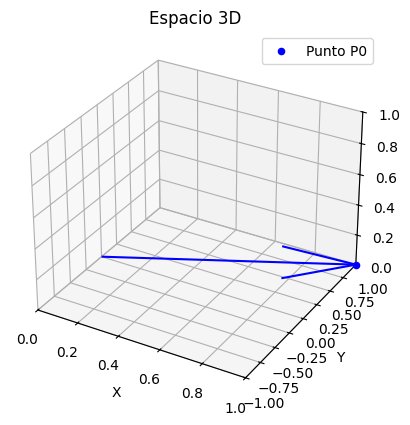

In [9]:
dibujar_punto(P0, "Punto P0", y_lim=[-1,1])

### **Aplicación de la matrix de rotación**



In [20]:
theta_val = np.pi #180 grados en radianes
R_p0 = np.array(R_x.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto

P0_rotado = np.dot(R_p0, P0) #Producto punto entre la matrix de rotación y el vector de posición del punto
print(P0_rotado)

[ 1.0000000e+00 -1.0000000e+00  1.2246468e-16]


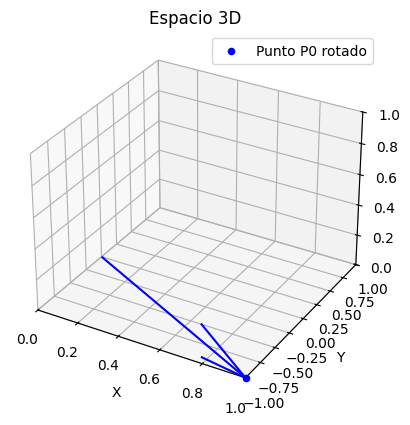

In [21]:
dibujar_punto(P0_rotado, "Punto P0 rotado", y_lim=[-1, 1])

### **Aplicación de la matrix de rotación**

In [22]:
theta_val = np.pi/4 # 45 grados en radianes
R_p0 = np.array(R_x.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto

P0_rotado = np.dot(R_p0, P0) #Producto punto entre la matrix de rotación y el vector de posición del punto
print(P0_rotado)

[1.         0.70710678 0.70710678]


In [ ]:
dibujar_punto(P0_rotado, "Punto P0 rotado", y_lim=[0, 1])

### **Rotación en el eje y**



In [13]:
R_y = Matrix([[cos(theta), 0, sin(theta)], [0, 1, 0], [-sin(theta), 0, cos(theta)]])
R_y

⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦

### **Rotación en el eje z**

In [14]:
R_z = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
R_z

⎡cos(θ)  -sin(θ)  0⎤
⎢                  ⎥
⎢sin(θ)  cos(θ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

### **Ilustración angulos de rotación**

In [ ]:
from IPython.display import Image


Image(url='https://www.researchgate.net/publication/348803228/figure/fig7/AS:984434408955905@1611718861641/a-Pitch-yaw-and-roll-angles-of-an-aircraft-with-body-orientation-O-u-v-original.ppm')


### **Multiples rotaciones**

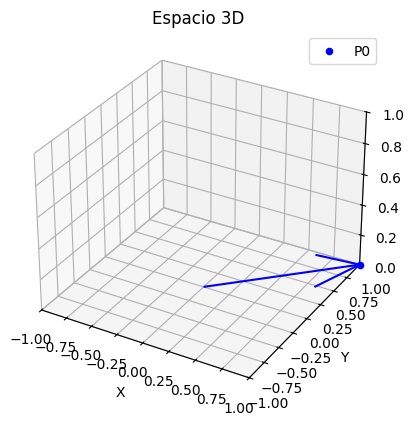

In [17]:
dibujar_punto(P0, "P0",x_lim=[-1, 1], y_lim=[-1, 1])

In [15]:
theta_val = np.pi # 45 grados en radianes
R_x_p0 = np.array(R_x.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx
R_y_p0 = np.array(R_y.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Ry
R_z_p0 = np.array(R_z.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rz

P0_rotado_x = np.dot(R_x_p0, P0) #Producto punto entre la matrix de rotación y el vector de posición del punto
P0_rotado_y = np.dot(R_y_p0, P0_rotado_x) #Producto punto entre la matrix de rotación y el vector de posición del punto
P0_rotado_z = np.dot(R_z_p0, P0_rotado_y) #Producto punto entre la matrix de rotación y el vector de posición del punto

print(P0)
print(P0_rotado_x)
print(P0_rotado_y)
print(P0_rotado_z)

[1 1 0]
[ 1.0000000e+00 -1.0000000e+00  1.2246468e-16]
[-1.0000000e+00 -1.0000000e+00 -2.4492936e-16]
[ 1.0000000e+00  1.0000000e+00 -2.4492936e-16]


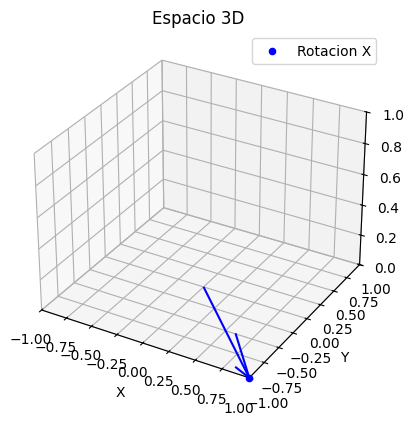

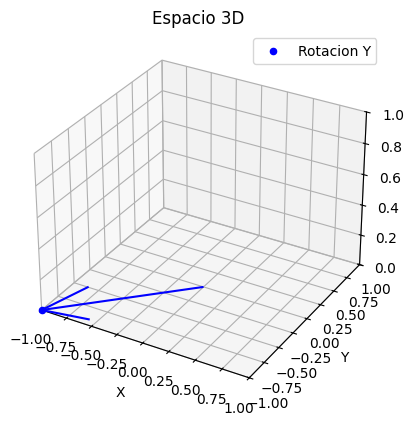

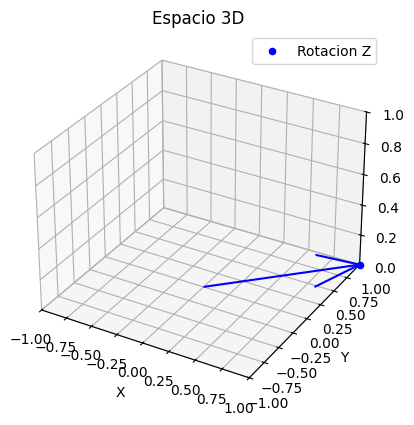

In [16]:
dibujar_punto(P0_rotado_x, label = 'Rotacion X', x_lim=[-1, 1], y_lim=[-1, 1])
dibujar_punto(P0_rotado_y, label = 'Rotacion Y', x_lim=[-1, 1], y_lim=[-1, 1])
dibujar_punto(P0_rotado_z, label = 'Rotacion Z', x_lim=[-1, 1], y_lim=[-1, 1])

# **Actividad**

1.   Evalue el efecto del orden de las rotaciones y saque sus propias conclusiones
2.   Agregue una función que re utilice la implementación compartida para hacer traslaciones

Ejercicio 1

In [ ]:
# Aplicar rotaciones en diferente orden
P0_rotado_y_first = np.dot(R_y_p0, P0)
P0_rotado_z_second = np.dot(R_z_p0, P0_rotado_y_first)
P0_rotado_x_third = np.dot(R_x_p0, P0_rotado_z_second)

print("Rotación Y primero, luego Z, luego X:")
print(P0_rotado_x_third)

dibujar_punto(P0_rotado_x_third, label='Rotación Y, Z, X', x_lim=[-1, 1], y_lim=[-1, 1])

Ángulo: 0.7853981633974483, Orden: xyz, Punto rotado: [ 0.35355339  1.35355339 -0.20710678]


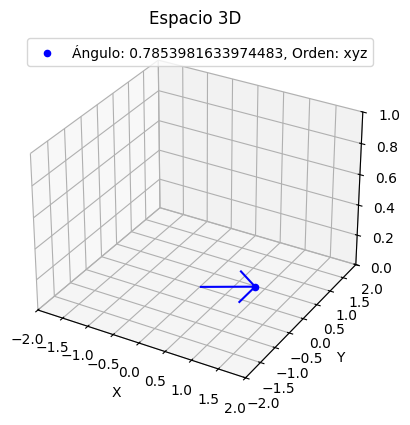

Ángulo: 0.7853981633974483, Orden: zyx, Punto rotado: [7.85046229e-17 1.00000000e+00 1.00000000e+00]


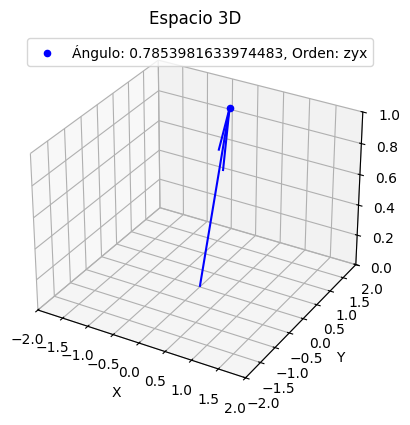

Ángulo: 0.7853981633974483, Orden: yxz, Punto rotado: [-0.35355339  1.35355339  0.20710678]


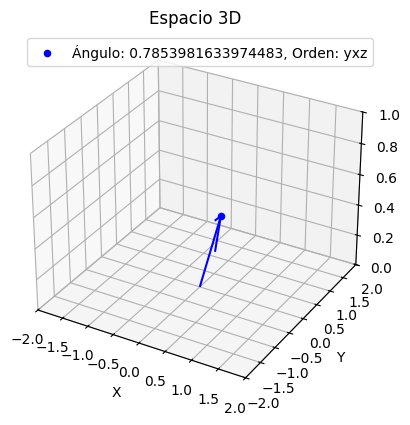

Ángulo: 1.5707963267948966, Orden: xyz, Punto rotado: [ 0.  1. -1.]


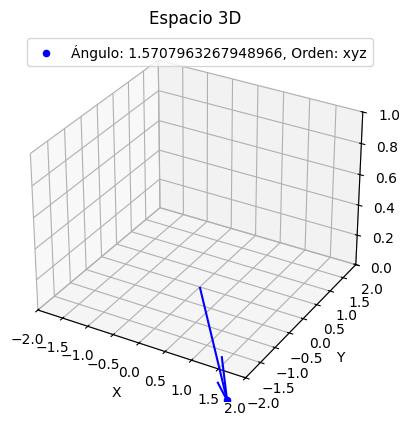

Ángulo: 1.5707963267948966, Orden: zyx, Punto rotado: [-6.123234e-17 -1.000000e+00  1.000000e+00]


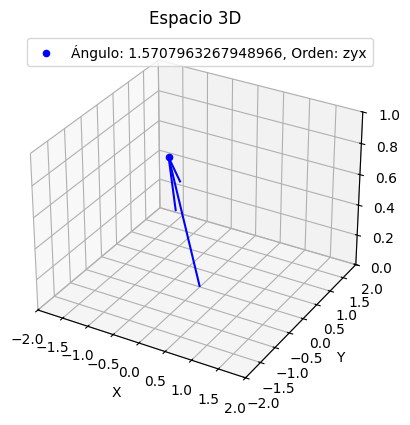

Ángulo: 1.5707963267948966, Orden: yxz, Punto rotado: [-1.0000000e+00  1.2246468e-16  1.0000000e+00]


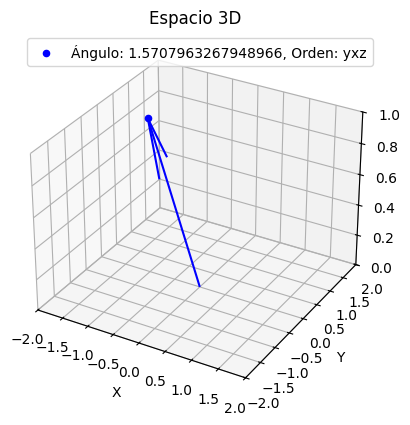

Ángulo: 3.141592653589793, Orden: xyz, Punto rotado: [ 1.0000000e+00  1.0000000e+00 -2.4492936e-16]


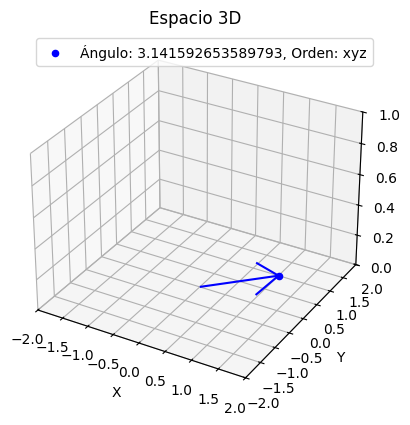

Ángulo: 3.141592653589793, Orden: zyx, Punto rotado: [ 1.0000000e+00  1.0000000e+00 -2.4492936e-16]


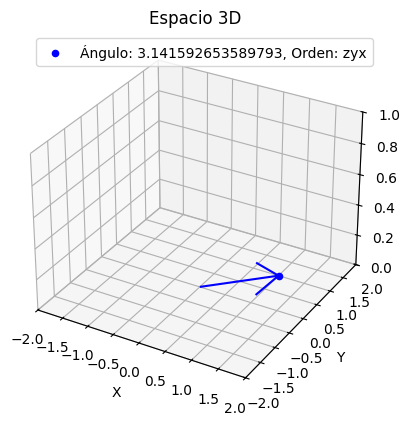

Ángulo: 3.141592653589793, Orden: yxz, Punto rotado: [1.0000000e+00 1.0000000e+00 2.4492936e-16]


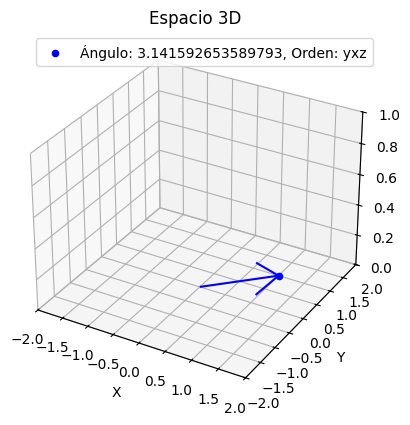

In [ ]:
# Definir diferentes ángulos de rotación
theta_val_45 = np.pi / 4  # 45 grados en radianes
theta_val_90 = np.pi / 2  # 90 grados en radianes
theta_val_180 = np.pi     # 180 grados en radianes

# Aplicar rotaciones con diferentes ángulos y órdenes
def aplicar_rotaciones(punto, angulo, orden):
    """

    PARAMETROS:
        
    """
    R_x_p0 = np.array(R_x.subs({theta: angulo})).astype(np.float64)
    R_y_p0 = np.array(R_y.subs({theta: angulo})).astype(np.float64)
    R_z_p0 = np.array(R_z.subs({theta: angulo})).astype(np.float64)
    
    if orden == 'xyz':
        punto_rotado = np.dot(R_x_p0, punto)
        punto_rotado = np.dot(R_y_p0, punto_rotado)
        punto_rotado = np.dot(R_z_p0, punto_rotado)
    elif orden == 'zyx':
        punto_rotado = np.dot(R_z_p0, punto)
        punto_rotado = np.dot(R_y_p0, punto_rotado)
        punto_rotado = np.dot(R_x_p0, punto_rotado)
    elif orden == 'yxz':
        punto_rotado = np.dot(R_y_p0, punto)
        punto_rotado = np.dot(R_x_p0, punto_rotado)
        punto_rotado = np.dot(R_z_p0, punto_rotado)
    
    return punto_rotado

# Punto inicial
P0 = np.array([1, 1, 0])

# Probar diferentes ángulos y órdenes
ordenes = ['xyz', 'zyx', 'yxz']
angulos = [theta_val_45, theta_val_90, theta_val_180]

for angulo in angulos:
    for orden in ordenes:
        punto_rotado = aplicar_rotaciones(P0, angulo, orden)
        print(f"Ángulo: {angulo}, Orden: {orden}, Punto rotado: {punto_rotado}")
        dibujar_punto(punto_rotado, label=f'Ángulo: {angulo}, Orden: {orden}', x_lim=[-2, 2], y_lim=[-2, 2])

Ejercicio 2

In [24]:
def trasladar_punto(punto, traslacion):
    """
    Traslada un punto en un espacio tridimensional.

    Parametros:
        punto: Un vector NumPy de tres elementos representando las coordenadas (x, y, z) del punto.
        traslacion: Un vector NumPy de tres elementos representando la traslación en cada eje (dx, dy, dz).
    
    Retorna:
        Un vector NumPy de tres elementos con las nuevas coordenadas del punto trasladado.
    """
    return punto + traslacion

Ejemplo de uso de la función trasladar

Punto trasladado:
[1.5 0.5 0.5]


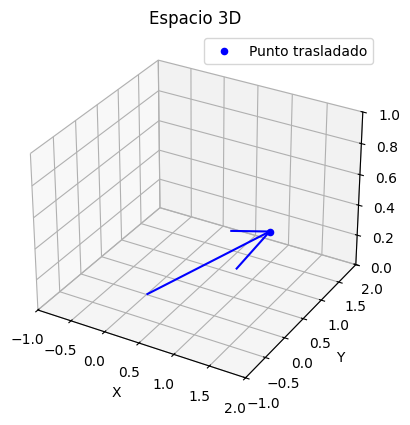

In [28]:
traslacion = np.array([0.5, -0.5, 0.5])
P0_trasladado = trasladar_punto(P0, traslacion)
print("Punto trasladado:")
print(P0_trasladado)

dibujar_punto(P0_trasladado, label='Punto trasladado', x_lim=[-1, 2], y_lim=[-1, 2])